In [ ]:
import numpy as np
import rasterio
import geopandas as gpd

# 2. Define criteria and weights
criteria = ["Other schools", "Hospitals", "Roads", "Transportation"]
weights = [7, 5, 9, 8]

# 3. Create pairwise comparison matrix
n = len(criteria)
matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        if i == j:
            matrix[i, j] = 1
        else:
            # Replace with your own pairwise comparisons (e.g., 2 for i preferred over j)
            input_value = float(input(f"Enter relative importance of {criteria[i]} over {criteria[j]} (1-9 scale): "))
            matrix[i, j] = input_value
            matrix[j, i] = 1 / matrix[i, j]

print("Pairwise comparison matrix:")
print(matrix)

# 4. Calculate consistency ratio
eigenvector, _ = np.linalg.eig(matrix)
lambda_max = eigenvector.sum() / n
consistency_index = (lambda_max - n) / (n - 1)
consistency_ratio = consistency_index / 0.3

print("Eigenvector:", eigenvector)
print("Consistency index:", consistency_index)
print("Consistency ratio:", consistency_ratio)

# Load raster data
raster_paths = [
    "/content/schools.tif",
    "/content/hospitals.tif",
    "/content/roads.tif",
    "/content/transport.tif"
    ]


In [6]:
# Normalize raster data (adjust formula if needed)
normalized_rasters = []

for path in raster_paths:
    with rasterio.open(path) as src:
        raster = src.read(1)

        # Revised normalization formula
        normalized_raster = (raster - raster.min()) / (raster.max() - raster.min())
        normalized_rasters.append(normalized_raster)

        # Check and print information about the raster values
        print(f"Raster Path: {path}")
        print(f"Original Raster Values: Min = {raster.min()}, Max = {raster.max()}")
        print(f"Normalized Raster Values: Min = {normalized_raster.min()}, Max = {normalized_raster.max()}\n")

Raster Path: /content/schools.tif
Original Raster Values: Min = 1, Max = 15
Normalized Raster Values: Min = 0.0, Max = 1.0

Raster Path: /content/hospitals.tif
Original Raster Values: Min = 1, Max = 15
Normalized Raster Values: Min = 0.0, Max = 1.0

Raster Path: /content/roads.tif
Original Raster Values: Min = 0, Max = 6
Normalized Raster Values: Min = 0.0, Max = 1.0

Raster Path: /content/transport.tif
Original Raster Values: Min = 0, Max = 6
Normalized Raster Values: Min = 0.0, Max = 1.0



In [14]:
# Apply weights and overlay data
weights = [7.43603373, 0.43618483, 0.43618483, 2.40258204]
weighted_sum = np.zeros_like(normalized_rasters[0])

for i in range(len(normalized_rasters)):
    weighted_sum += normalized_rasters[i] * weights[i]

<ipython-input-16-675cfbe2b3fa>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", num_classes)


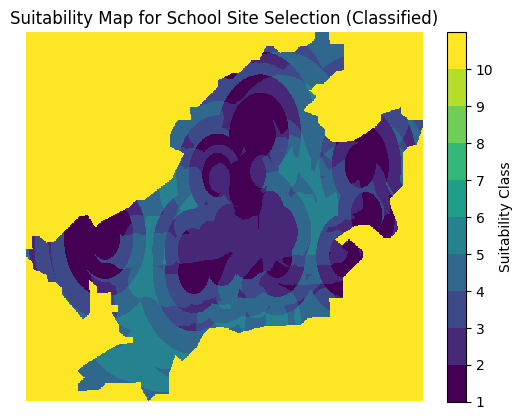

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

num_classes = 10
quantiles = np.linspace(0, 1, num_classes + 1)
classes = np.quantile(weighted_sum, quantiles)
classified_suitability = np.digitize(weighted_sum, classes)

# Use viridis colormap with a custom number of colors
cmap = plt.cm.get_cmap("viridis", num_classes)
new_cmap = ListedColormap(cmap(np.linspace(0, 1, num_classes)))

# Visualize suitability map without axis scales
plt.imshow(classified_suitability, cmap=new_cmap, aspect="auto", interpolation="none")
plt.colorbar(ticks=range(len(classes)), label="Suitability Class")
plt.title("Suitability Map for School Site Selection (Classified)")

# Remove axis scales
plt.axis('off')

plt.show()